# Instalação `OpenBTS`
Instalação e configuração de um transceiver GSM no USRP utilizando OpenBTS.

## 1. Abrir terminal. Pressione as teclas:
Obs: Repetir procedimento para cada novo terminal.

In [ ]:
CRTL+ALT+t

## 2. O projeto OpenBTS utiliza vários novos recursos no Git. Para certificar-se de que seu cliente é compatível (por exemplo, mais recente que 1.8.2). Digite no terminal: 
Desconsiderar procedimento cado o Git já esteja instalado. É ncessário que você instale uma versão do Git superior a versão 1.8.2. Digite no terminal:

In [ ]:
$ sudo apt-get install software-properties-common python-software-properties
$ sudo add-apt-repository ppa:git-core/ppa
(press enter to continue)
$ sudo apt-get update
$ sudo apt-get install git

## 3. Verificar a versão do Git. Digite no terminal:

In [ ]:
$ git --version
git version x.x.x

## 4. Criar pasta de instalação do OpenBTS. Digite no terminal:

In [ ]:
$ mkdir openBTS
$ cd openBTS/ 

## 5. Baixar a última versão do openBTS via Git. Digite no terminal: 

In [ ]:
$ git clone https://github.com/RangeNetworks/dev.git

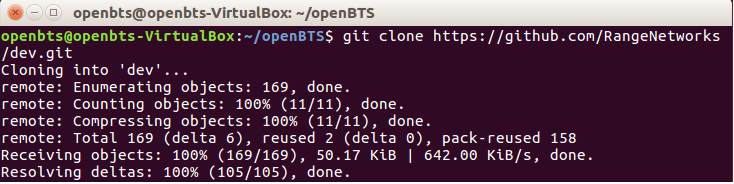

## 6. Baixar os componentes (asterisk, asterisk-config, CommonLibs, NodeManager, SR, subscriberRegistry e system-config). Digite no terminal:

In [ ]:
$ cd dev
$ ./clone.sh

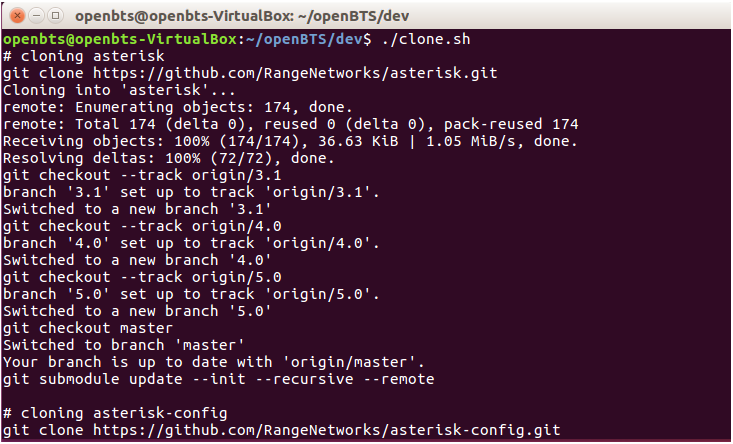

## 7. Antes de compilar você deve escolher um branch usando switchto.sh. Digite no terminal:

In [ ]:
$ ./switchto.sh master
(or)
$ ./switchto.sh 4.0
(or)
$ ./switchto.sh v4.0.0

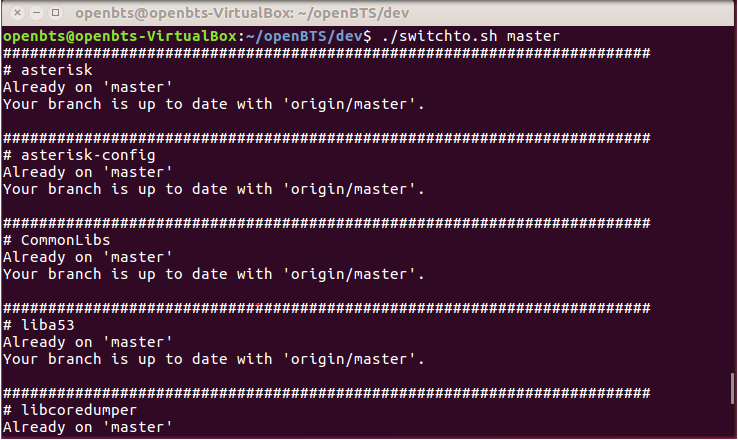

## 8. O script build.sh instalará automaticamente todas as dependências de compilação e construirá um pacote de instalação para cada componente. Digite no terminal:
Depois que as dependências são resolvidas, cada componente é compilado em um pacote instalável.

In [ ]:
$ ./build.sh <radio-type>

O rádio disponível em laboratório é o N210.
Os pacotes compilados estão agora em um novo diretório chamado BUILDS/data-horas.

É possível que você receba uma mensagem indicando dependências, digite a senha de
administrador e pressione ENTER para continuar. Agora pode ir tomar uma água, pois esse
processo vai demorar!

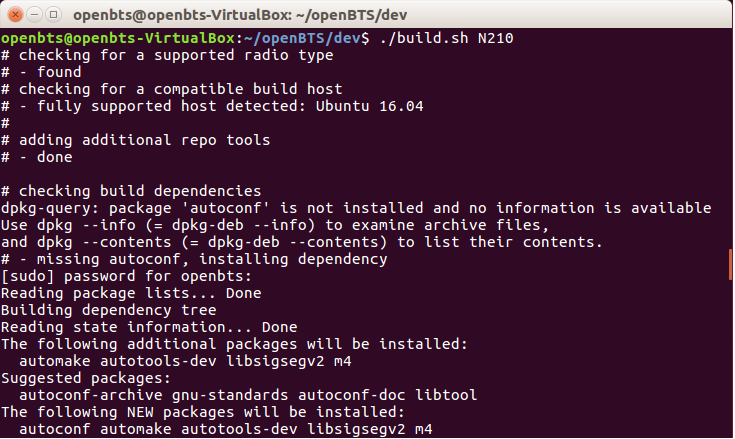

## 9. Use o dpkg para instalar os novos pacotes (isso irá reclamar das dependências). Digite no terminal (por exemplo):

In [ ]:
$ sudo dpkg -i BUILDS/2022-08-29--16-20-43/*.deb

Digite Y se for perguntado se você quer realmente instalar os pacotes.

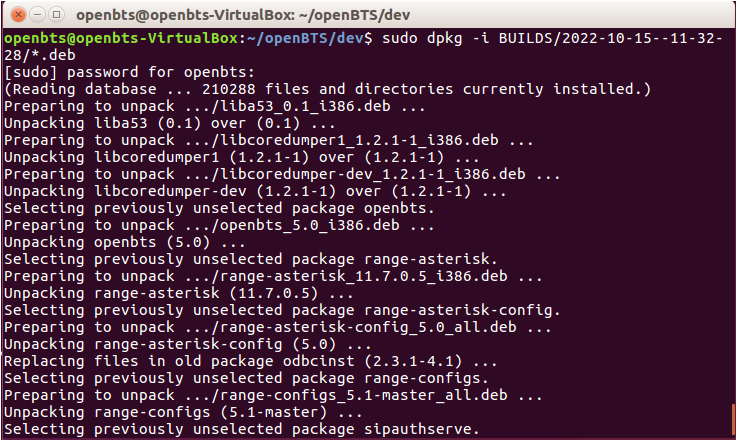

## 10. Para que o Aptitude resolva as dependências, Digite no terminal:

In [ ]:
$ sudo apt-get -f install

Digite Y se for perguntado se você quer realmente instalar os pacotes.

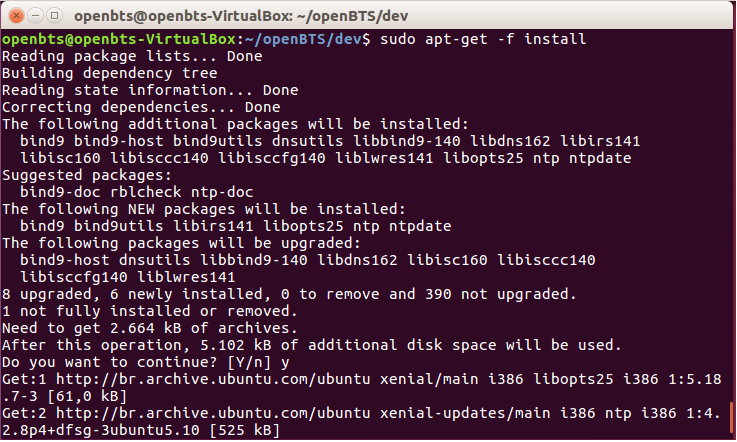

Esses procedimentos seguem os passos de [https://github.com/RangeNetworks/dev/wiki](https://github.com/RangeNetworks/dev/wiki). 

## 11. Inserir mais uma vez o comando do passo 10.

In [ ]:
$ sudo dpkg -i BUILDS/2022-08-29--16-20-43/*.deb

## 12. Você precisa criar um link simbólico para o arquivo executável transceiver52M. Digite no terminal:

In [ ]:
$ cd openbts/apps/
$ ln -s ../Transceiver52M/transceiver .

Para testar se o link foi criado, digite:

In [ ]:
$ ls –lah

Você verá a seguinte tela (o link aparecerá em azul no final):

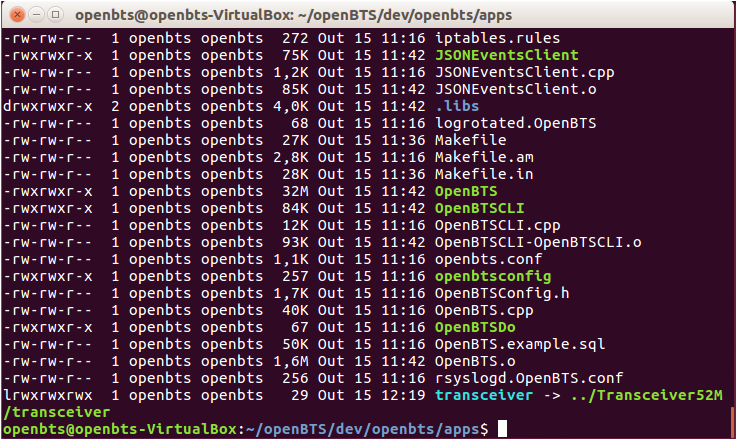

## 13. Verificando a configuração do OpenBTS. Procure se o seguinte arquivo existe: /etc/OpenBTS/OpenBTS.db
Ele é um banco de dados que guarda todas as configurações do OpenBTS. Ele precisa ser criado na pasta “/etc/OpenBTS”. Para verificar se o arquivo existe, digite no terminal:

In [ ]:
$ ls /etc/OpenBTS/OpenBTS.db
$ sudo sqlite3 -init ./apps/OpenBTS.example.sql /etc/OpenBTS/OpenBTS.db ".quit"

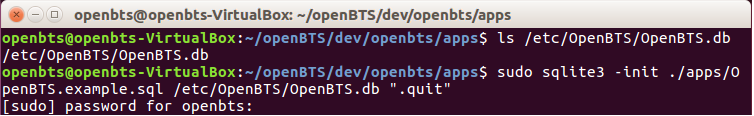

Você ainda pode testar se o arquivo com o seguinte comando:

In [ ]:
$ sudo sqlite3 /etc/OpenBTS/OpenBTS.db .dump

Se você visualizar uma série de variáveis de configuração, o banco de dados está instalado corretamente.

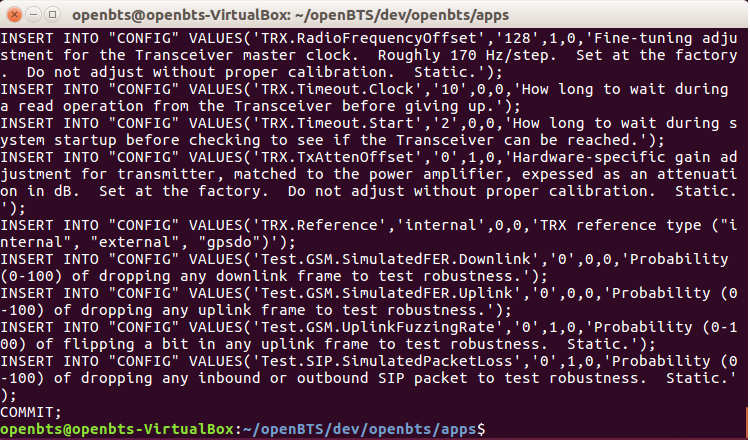

Se o arquivo não existir, digite a sequencia de comandos abaixo para criá-lo:

In [ ]:
$ sudo mkdir /etc/OpenBTS
$ sudo sqlite3 -init ./OpenBTS.example.sql /etc/OpenBTS/OpenBTS.db ".quit"

## 14. Configurar segundo adaptador na máquina virtual

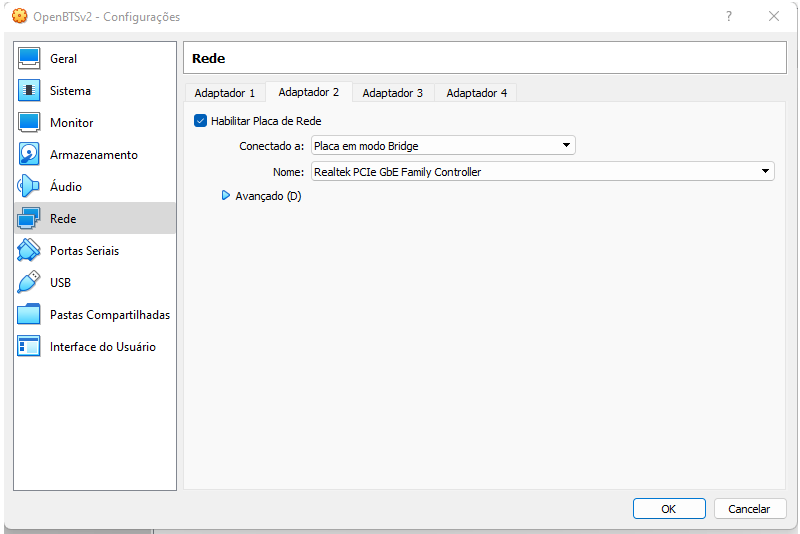

Inserir IP fixo no segundo adaptador, 192.168.10.1/24.

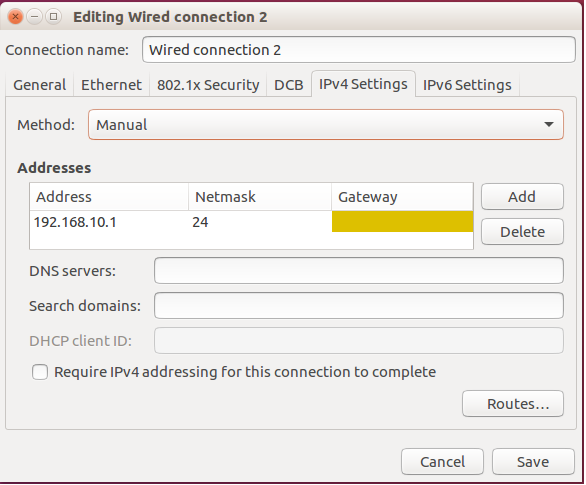

## 15. Rodar openBTS

Plug a USRP no computador, abra outro terminal (crtl+alt+t) e digite:

In [ ]:
$ uhd_usrp_probe

Antes de abrir o openBTS é importante verificar algumas mensagens de Alerta (warnings).

Se necessario atualização do firmware.

In [ ]:
$ sudo su
/usr/lib/uhd/utils/uhd_images_downloader.py
/sudo /usr/bin/uhd_image_loader --args="type=usrp2, addr=192.168.1.2"

Se relacionadas com a memória alocada para a USRP. Duas mensagens em especial, sugere para que dois buffers sejam modificados. Digite em um terminal:

In [ ]:
$ sudo sysctl -w net.core.rmem_max=50000000
$ sudo sysctl -w net.core.wmem_max=1048576

Se você vir a seguinte mensagem de alerta, tudo deu certo.

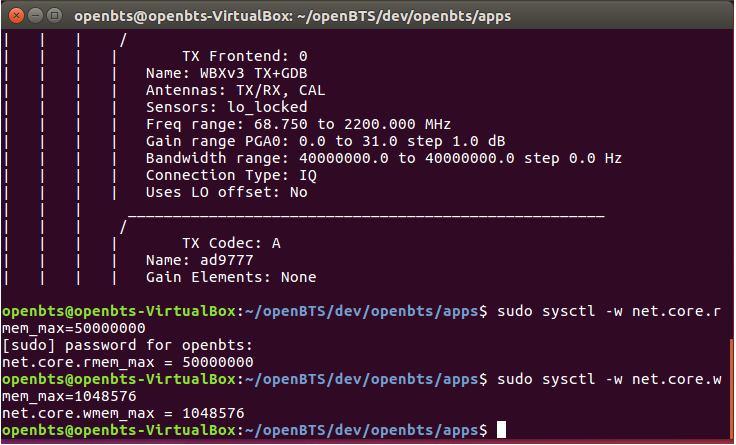

Agora, para iniciar o OpenBTS, digite:

In [ ]:
sudo ./OpenBTS

A seguir, CLI do OpenBTS:

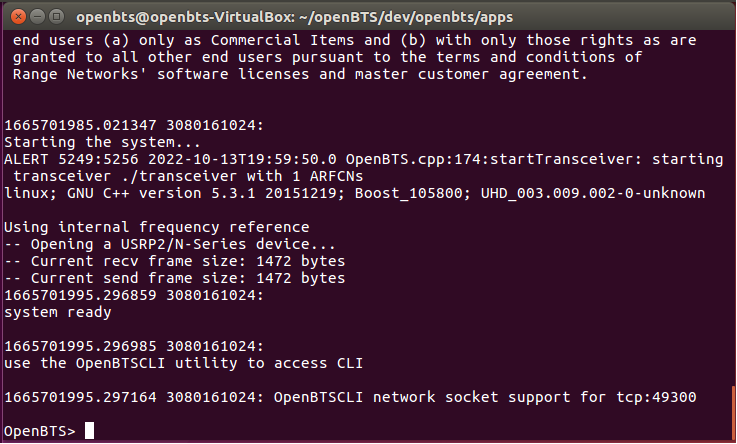

# Configuração `OpenBTS`

Em algumas versões do OpenBTS o openBTSCLI já é aberto automaticamente. Se não for, ele deve ser aberto para configurar algumas variáveis.

## 1. Abra outro terminal (crtl+alt+t) e digite:

In [ ]:
sudo ./OpenBTSCLI

Você verá:

In [ ]:
OpenBTS>

## 2. Para ver as configurações correntes, digite:

OpenBTS> config

Você verá uma lista de configuração de sua BTS GSM.

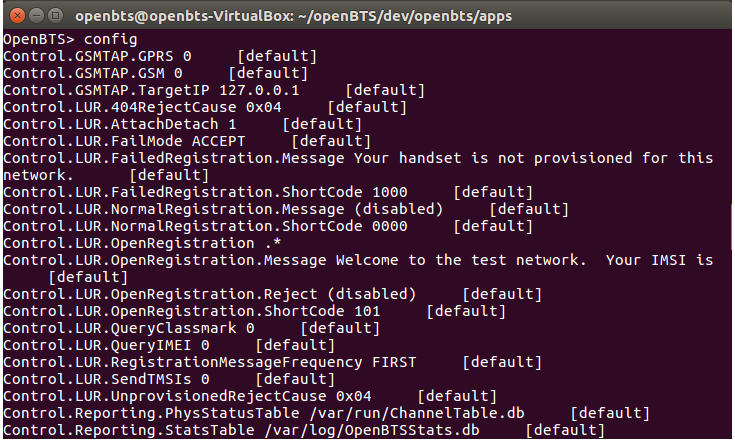

## 3. Agora verifique se as seguintes configurações estão corretas:

### 3.1. GSM.Radio.Band - Set this to the GSM band appropriate for your hardware. Para visualizar, digite:

In [ ]:
OpenBTS> config GSM.Radio.Band

Se não tiver em 900, mude digitando:

In [ ]:
OpenBTS> config GSM.Radio.Band 900

### 3.2. GSM.Radio.C0 - This is the ARFCN. Set it to something appropriate for your band. (se não tiver, mude para GSM.Radio.C0 51), digitando:

In [ ]:
OpenBTS> config GSM.Radio.C0

Se não tiver em 51, mude digitando:

OpenBTS> config GSM.Radio.C0 51

### 3.3. Control.LUR.OpenRegistration - This tells OpenBTS to not reject your handset just because your registration server (below) isn't responding. Aqui você deve digitar a seguinte configuração:

In [ ]:
OpenBTS> config Control.LUR.OpenRegistration .*

### 3.4. GSM.Radio.RxGain - Receiver gain setting in dB. Aqui você deve digitar a seguinte configuração:

O valor ideal é determinado pelo hardware é 47 dB para RAD1 e 0-10 dB para hardware Ettus. Este parâmetro do banco de dados é estático, mas o ganho do receptor pode ser modificado em tempo real com o comando CLI "rxgain".

Ref. Getting Started with OpenBTS, pg 39.

In [ ]:
OpenBTS> devconfig GSM.Radio.RxGain 2

### 3.5. Control.LUR.OpenRegistration – determina o nome da rede. Digite:

In [ ]:
OpenBTS> config GSM.Identity.ShortName GppComNet

### 3.6. Outros commando úteis:

In [ ]:
OpenBTS> help (Ver todos os commandos disponíveis)
OpenBTS> audit (Para determinar se algo precisa ser ajustado)

E quiser sair (não saia!), digite (crtl+c) para sair do OpenBTSCLI.

# Inicializando o `Sipauthserve`

O openBTS depende da instalação de um servidor de autenticação SIP (Sipauthserver) para registro de tráfego e de um Subscriber Registry para resgistro de usuários. Sem eles o sistema não funcionará. Para instalá-los, siga os seguintes passos:

## 1. Localizando banco de dados

Para configurar um cliente, precisamos de um banco de dados, que, por padrão, é localizado em /var/lib/asterisk/sqlite3dir. Assim, digite no terminal:

In [ ]:
$ ls /var/lib/asterisk/sqlite3dir

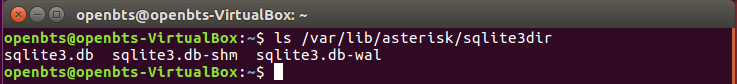

Se a pasta não existir, pode criá-la com o seguinte comando:

In [ ]:
$ sudo mkdir -p /var/lib/asterisk/sqlite3dir

## 2. Servidor de autenticação SIP (Sipauthserve)

Sipauthserve é um daemon apropriadamente chamado a prestação de serviços de autenticação SIP. A variável SIP.Proxy.Registration do OpenBTS deve apontar para seu hostname e port (isso é feito automaticamente). Para instalar o Sipauthserve, digite em um terminal (supondo que você está em ~/openBTS/public/openbts/trunk/apps):

Daemon (computing) In multitasking computer operating systems, a daemon is a computer program that runs as a background process, rather than being under the direct control of an interactive user. Traditionally daemon names end with the letter d: for example, syslogd is the daemon that implements the system logging facility and sshd is a daemon that services incoming SSH connections. (fonte: http://en.wikipedia.org/wiki/Daemon_(computing))

Agora precisamos configurar o Sipauthserve. Verifique se o banco de dados sipauthserve.db já está no local correto. Digite no terminal:

In [ ]:
ls /etc/OpenBTS/

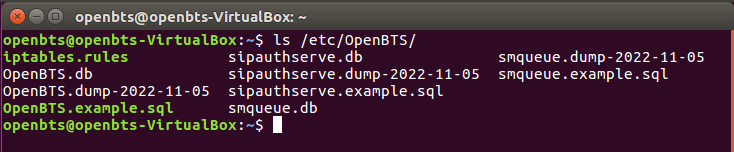

Se você vir o arquivo na pasta, execute o servidor de autenticação, digitando o comando a seguir em um novo terminal (crtl+alt+t para abrir um novo terminal):

In [ ]:
$ cd /OpenBTS/
$ sudo ./sipauthserve

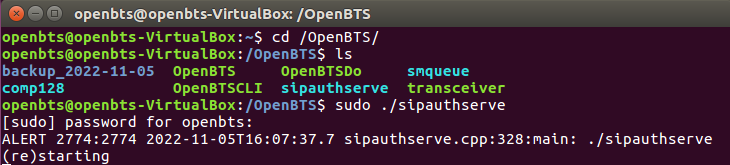

Se o arquivo do banco de dados (sipauthserve.db) não estiver na pasta /etc/OpenBTS, digite o seguinte comando para criá-lo:

In [ ]:
sudo sqlite3 -init ../../subscriberRegistry/apps/subscriberRegistry.example.sql /etc/OpenBTS/sipauthserve.db ".quit"

E execute o Sipauthserve.

## 3. Registrando assinante

# Configuração do  `Dispositivo Móvel `

Agora você já pode procurar a rede no seu celular e se registrar. Você verá uma rede chamada 00101 (test) network. Você já pode tentar se conectar (attach), que a rede te aceitará. Quando você se conectar, receberá uma SMS informando seu número IMSI. Guarde esse SMS que é muito importante.

## 1. Buscar rede manualmente e se registrar

O menu de cada aparelho é diferente, mas o item geralmente é semelhante a "Seleção de operadora" ou "Seleção de rede".

Passos para busca manual em Android:

1. Inicie o aplicativo “Configurações” no sistema de menus do Android.
2. Selecione “Mais”.
3. Selecione “Redes móveis”.
4. Selecione “Operadores de rede”. Isso pode ou não iniciar uma pesquisa. Se não, selecione “Redes de pesquisa.”
5. Uma vez finalizada a busca, é apresentada uma lista de redes de operadoras disponíveis.

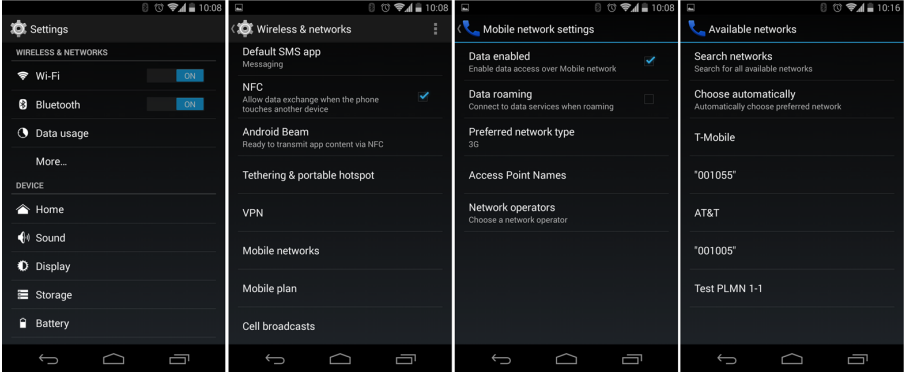

Fonte: Getting Started with OpenBTS: Build Open Source Mobile Networks, 2015.

Passos para busca manual em iOS:

1. Na tela inicial, abra o aplicativo “Configurações”.
2. Selecione “Transportadora”.
3. Na tela “Seleção de Rede”, desative a seleção automática de operadora.
4. O aparelho irá agora procurar redes de operadoras disponíveis.
5. Uma vez finalizada a busca, é apresentada uma lista de redes de operadoras disponíveis.

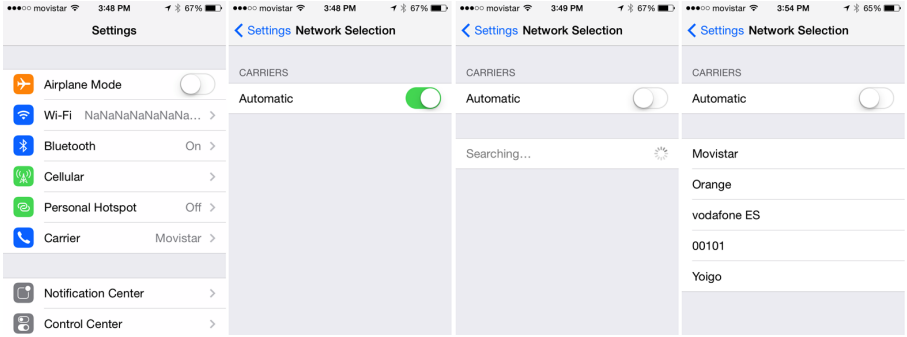

Fonte: Getting Started with OpenBTS: Build Open Source Mobile Networks, 2015.

Você verá uma rede chamada de "00101", "001-01", "Teste PLMN 1-1" ou "01".

## 2. Após a conexão estabelecida o dispositivo receberá um SMS informando seu IMSI.

Também é possível consultar os dispositivos conectados na rede através da CLI do OpenBTS, digitando:

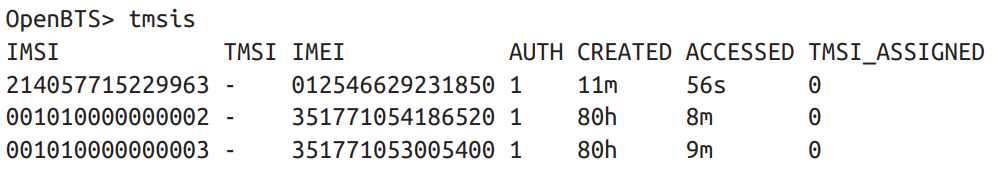

# Configuração do `Asterisk`

As configurações do ASTERISK são para permitir o registro de números de celulares através do IMSI (International mobile Subscriber Identity). Se a instalação deu certo até aqui, você recebeu uma mensagem da rede informando o IMSI do seu celular. Guarde esse número.

## 1. Você precisa editar dois arquivos de configuração do ASTERISK (extensions.conf e sip.conf). Para isso, abra um novo terminal e digite:

sudo mv /etc/asterisk/sip.conf /etc/asterisk/sip.conf_old & sudo mv /etc/asterisk/extensions.conf /etc/asterisk/extensions.conf_old

## 2. Copie os arquivos extensions.conf e sip.conf da pasta /home/openBTS/dev/asterisk-confi para o seu home.

## 3. Copie os arquivos extensions.conf e sip.conf para a pasta /etc/asterisk. Digite em um terminal:

In [ ]:
sudo cp ~/sip.conf /etc/asterisk/sip.conf & sudo cp ~/extensions.conf /etc/asterisk/extensions.conf

## 4. Para editar os extensions.conf e sip.conf, digite em um terminal:

In [ ]:
sudo gedit /etc/asterisk/sip.conf & sudo gedit /etc/asterisk/extensions.conf &

O programa GEDIT abrirá no modo de edição dos seguintes arquivos:

sip.conf→ para configurar seu “canal” para todas as conexões SIP e a maneira de autenticação dos usuários.

extensions.conf→ par definir o plano de ligações (dialplan), as extensões e o fluxo de chamada uma vez que é estabelecido um “canal”.

## 5. Proceda com a edição dos arquivos, como a seguir. Insira o seguinte texto no final de cada arquivo:

Arquivo sip.conf (verifique que o símbolo ; significa comentário. Tudo que for digitado na linha iniciada com ; será descartado pelo ASTERISK)

Arquivo extensions.conf:

## 6. Pode ocorrer um problema com permissão de execução do Asterisk. Para resolver esse problema é necessario editar o arquivo /etc/asterisk/asterisk.conf e incluir a variável "live_dangerously = Yes" no campo [options]. Para editar o arquivo digite em um novo terminal:

sudo gedit /etc/asterisk/asterisk.conf

## 7. Depois de editar os arquivos, você precisa atualizar o ASTERISK.

Note que o ASTERISK já está rodando e não precisa ser iniciado, mas reiniciado sempre que as configurações mudem. Existem algumas maneiras de fazer isso:

### 7.1. Em um terminal (sem está conectado ao Asterisk), digite (o comando pode não funcionar para algumas versões do asterisk):

In [ ]:
sudo /etc/init.d/asterisk restart

### 7.2. Conectando no Asterisk. Para isso digite:

In [ ]:
sudo asterisk –r

Você verá a seguinte tela: 

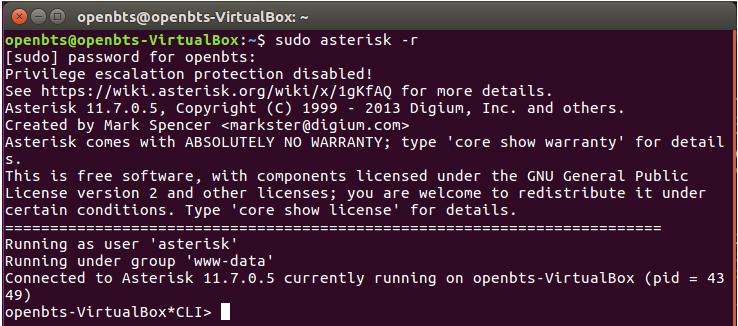

Se você encontrar problema, tente:

In [ ]:
sudo asterisk –C

ou

In [ ]:
asterisk -vvvvvvc

### 7.3. Alternativamente, quando algum número de telefone for adicionado aos arquivos extensions.conf e sip.conf, você pode atualizar o sistema, digitando no console do Asterisk:

In [ ]:
sip reload
dialplan reload

## 8. Problemas de execução

### 8.1. Permissão de execução do Asterisk (para versões mais atuais)

Para resolver tal problema, edite o arquivo /etc/asterisk/asterisk.conf e inclua a variável **live_dangerously = Yes** no campo **[options]**. Para editar o arquivo digite:

sudo gedit /etc/asterisk/asterisk.conf

### 8.2 Macro

In [ ]:
CLI> module load app_macro.so

### 8.3. Descompactar arquivos de audio